# Inference: Simple-Importance-Sampling MCMC

The class below takes a posterior and forms another by raising it to a power (1 minus temperature).

In [1]:
import os
os.chdir("..")
import pints
import pints.toy
import pints.plot
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

class TemperedLogPosterior(pints.LogPDF):
    def __init__(self, temperature, log_posterior):
        self._temperature = temperature
        self._log_posterior = log_posterior
        
    def __call__(self, x):
        return (1.0 - self._temperature) * self._log_posterior(x)

    def n_parameters(self):
        return self._log_posterior.n_parameters()
def ess(w):
    return int(1.0 / np.sum(w**2))

# Goodwin oscillator

### Untempered

[ 2.    4.    0.12  0.08  0.1 ]
Running
Done!


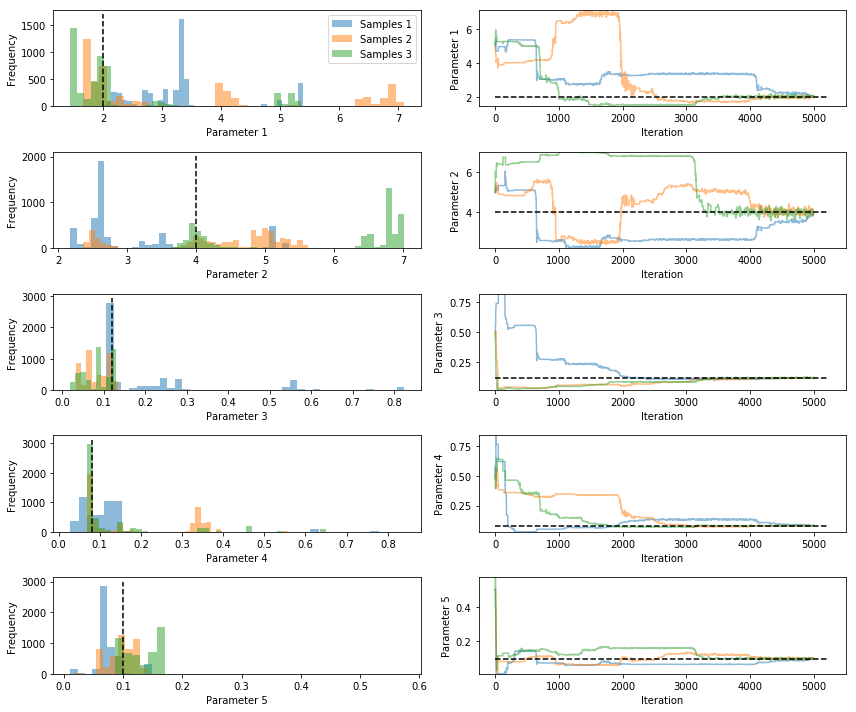

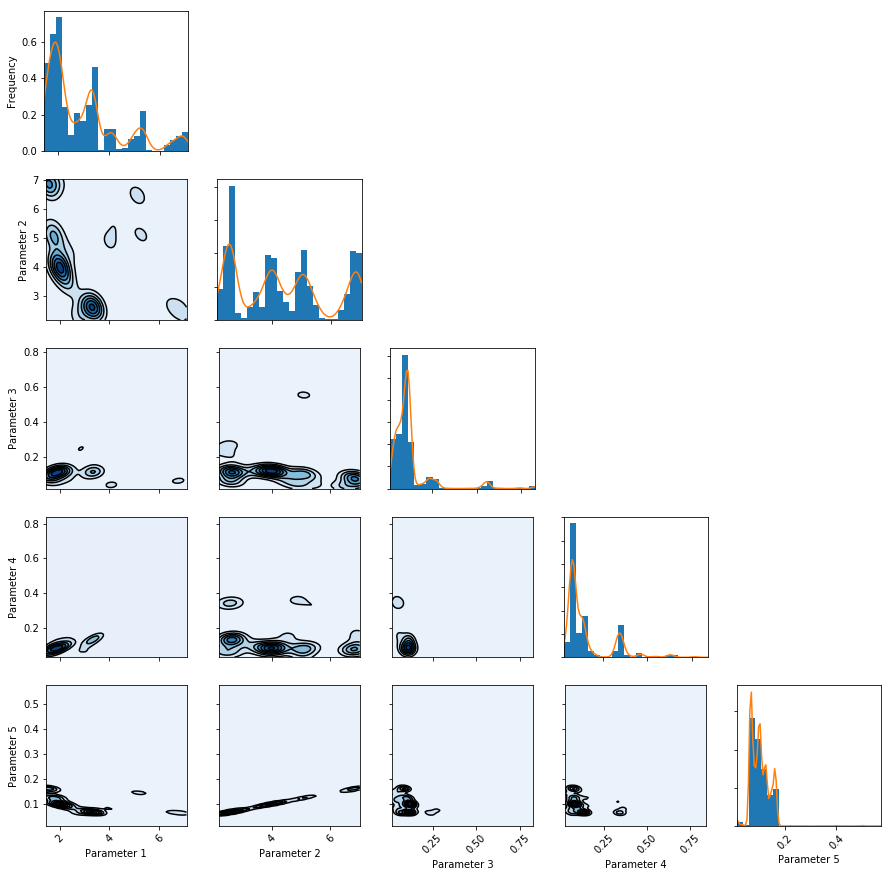

In [2]:
model = pints.toy.GoodwinOscillatorModel()
real_parameters = model.suggested_parameters()
print(real_parameters)
times = model.suggested_times()
values = model.simulate(real_parameters, times)
noise1 = 0.001
noise2 = 0.01
noise3 = 0.1
noisy_values = np.array(values, copy=True)
noisy_values[:, 0] += np.random.normal(0, noise1, len(times))
noisy_values[:, 1] += np.random.normal(0, noise2, len(times))
noisy_values[:, 2] += np.random.normal(0, noise3, len(times))

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 0.01, 0.01, 0.01], [10, 10, 1, 1, 1])
log_likelihood = pints.KnownNoiseLogLikelihood(problem, [noise1, noise2, noise3])
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

temperature = 0.0
log_posterior_t = TemperedLogPosterior(temperature=temperature, log_posterior=log_posterior)

# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
mcmc = pints.MCMCSampling(log_posterior_t, 3, x0)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)

print('Running')
chains = mcmc.run()
print('Done!')

# Get samples
samples=np.vstack(chains)

plt.figure()
pints.plot.trace(chains, ref_parameters=real_parameters)
plt.show()

# Look at distribution in chain 0
pints.plot.pairwise(samples, kde=True)

# Show graphs
plt.show()

### Tempered at T=0.5

[ 2.    4.    0.12  0.08  0.1 ]
Running
Done!


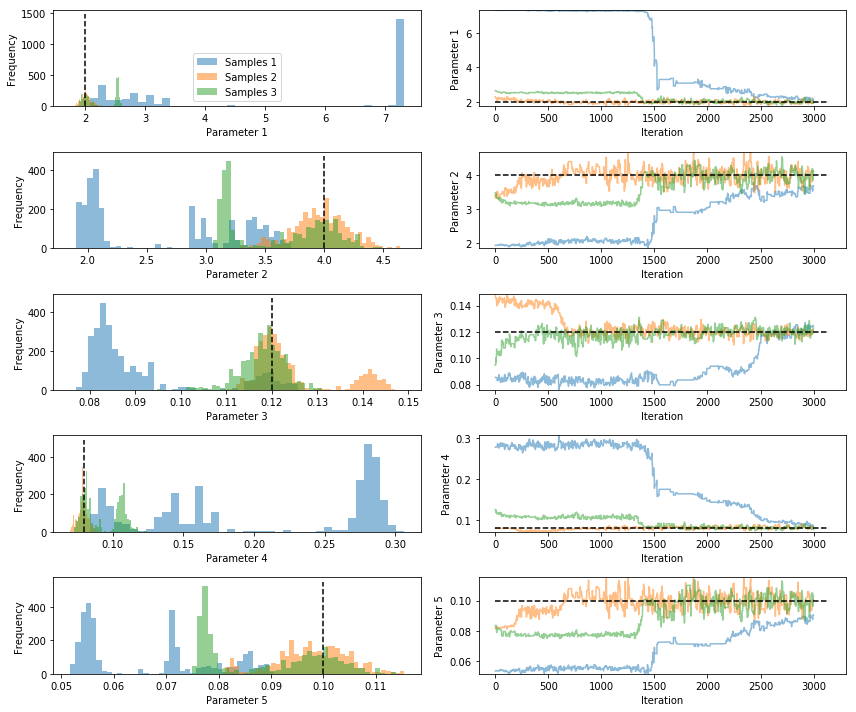

ESS = 1912


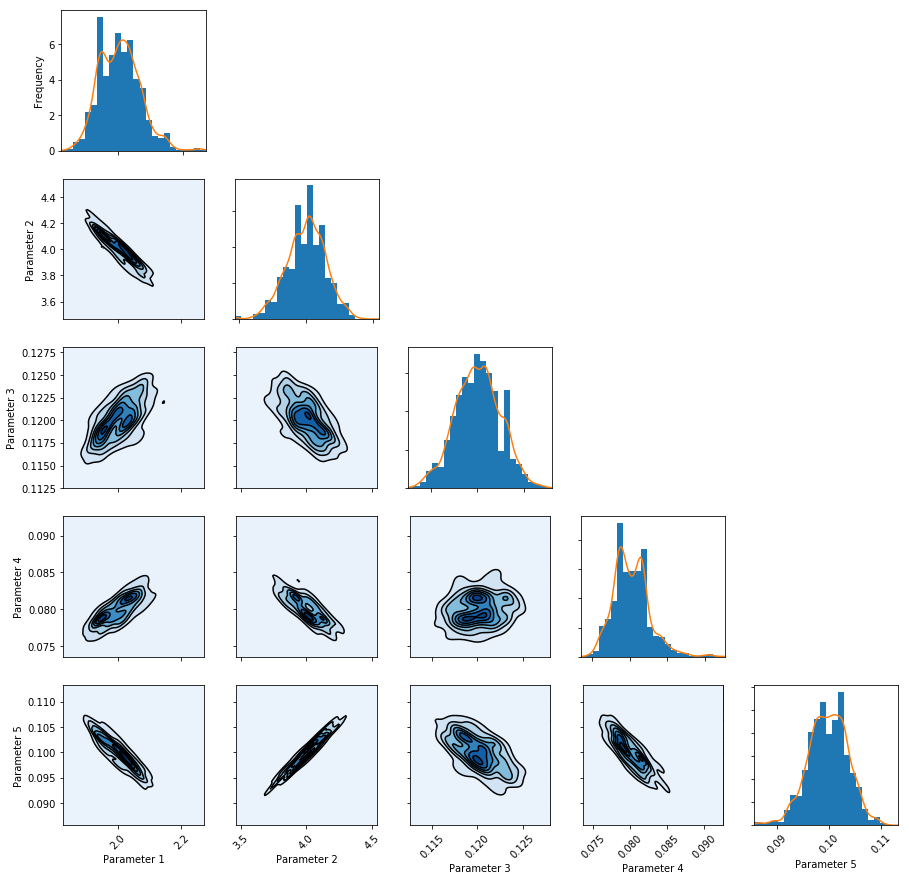

In [3]:
model = pints.toy.GoodwinOscillatorModel()
real_parameters = model.suggested_parameters()
print(real_parameters)
times = model.suggested_times()
values = model.simulate(real_parameters, times)
noise1 = 0.001
noise2 = 0.01
noise3 = 0.1
noisy_values = np.array(values, copy=True)
noisy_values[:, 0] += np.random.normal(0, noise1, len(times))
noisy_values[:, 1] += np.random.normal(0, noise2, len(times))
noisy_values[:, 2] += np.random.normal(0, noise3, len(times))

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 0.01, 0.01, 0.01], [10, 10, 1, 1, 1])
log_likelihood = pints.KnownNoiseLogLikelihood(problem, [noise1, noise2, noise3])
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

temperature = 0.5
log_posterior_t = TemperedLogPosterior(temperature=temperature, log_posterior=log_posterior)

# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
mcmc = pints.MCMCSampling(log_posterior_t, 3, x0)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)

print('Running')
chains = mcmc.run()
print('Done!')

# Discard warm up
chains = chains[:, 2000:, :]

plt.figure()
pints.plot.trace(chains, ref_parameters=real_parameters)
plt.show()

# Get samples
samples=np.vstack(chains)

log_weight = [temperature * log_posterior(sample) for sample in samples]
w = np.exp(log_weight - scipy.misc.logsumexp(log_weight))
print('ESS = ' + str(ess(w)))
idx = np.random.choice(len(w), size=ess(w), p=w)
samples1 = samples[idx, :]

# Look at distribution in chain 0
pints.plot.pairwise(samples1, kde=True)

# Show graphs
plt.show()

# Repressilator

### Untempered

Using Adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0          0:00.1
2     9      0         0.333     0          0:00.1
3     12     0.25      0.5       0          0:00.2
20    63     0.143     0.238     0.238      0:00.8
40    123    0.146     0.195122  0.244      0:01.5
60    183    0.164     0.213     0.246      0:02.1
80    243    0.185     0.21      0.247      0:02.6
100   303    0.168     0.208     0.208      0:03.1
120   363    0.174     0.223     0.19       0:03.6
140   423    0.156     0.191     0.184      0:04.1
160   483    0.136646  0.18      0.161      0:04.7
180   543    0.138     0.171     0.160221   0:05.3
Initial phase completed.
200   603    0.139     0.159204  0.159204   0:05.9
220   663    0.136     0.154     0.163      0:06.5
240   723    0.153527  0.149     0.174      0:07.1
260   783    0.199     0.146

3100  9303   0.247662  0.239     0.175      2:16.6
3120  9363   0.248     0.24      0.177      2:17.7
3140  9423   0.247     0.239     0.177      2:18.8
3160  9483   0.248     0.24      0.176      2:19.9
3180  9543   0.248     0.240176  0.176      2:21.0
3200  9603   0.249     0.24      0.176      2:22.1
3220  9663   0.25      0.240298  0.176      2:23.2
3240  9723   0.25      0.24      0.175      2:24.4
3260  9783   0.25      0.24      0.174      2:25.5
3280  9843   0.251     0.239     0.173      2:26.6
3300  9903   0.25      0.239     0.172      2:27.7
3320  9963   0.252     0.241     0.171      2:28.8
3340  10023  0.253     0.24      0.17       2:29.9
3360  10083  0.253     0.24      0.169      2:31.0
3380  10143  0.254     0.24      0.169      2:32.1
3400  10203  0.254925  0.239     0.169362   2:33.2
3420  10263  0.255     0.239     0.168      2:34.3
3440  10323  0.255449  0.238884  0.168      2:35.4
3460  10383  0.256     0.239     0.168      2:36.5
3480  10443  0.256     0.238   

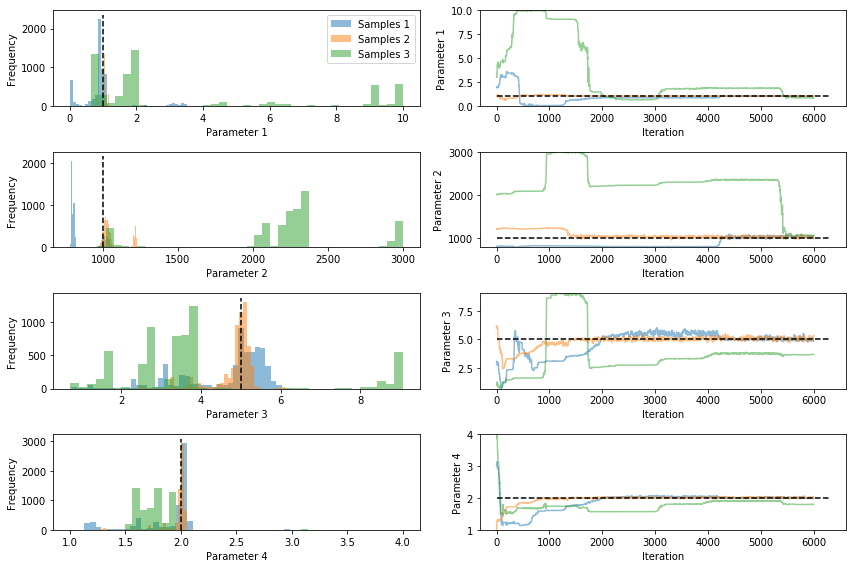

In [4]:
# Create a model
model = pints.toy.RepressilatorModel()

# Run a simulation
parameters = model.suggested_parameters()
times = model.suggested_times()
values = model.simulate(parameters, times)

# First add some noise
sigma = 5
noisy = values + np.random.normal(0, sigma, values.shape)

problem = pints.MultiOutputProblem(model, times, noisy)
log_likelihood = pints.KnownNoiseLogLikelihood(problem, sigma)
log_prior = pints.UniformLogPrior([0, 500, 0, 0], [10, 3000, 20, 10])

# Initial guesses
x0 = [
    [2, 800, 3, 3],
    [1, 1200, 6, 1],
    [3, 2000, 1, 4],
]
log_posterior = pints.LogPosterior(log_likelihood, log_prior)
mcmc = pints.MCMCSampling(log_posterior, 3, x0)
mcmc.set_max_iterations(6000)
chains = mcmc.run()

plt.figure()
pints.plot.trace(chains, ref_parameters=parameters)
plt.show()

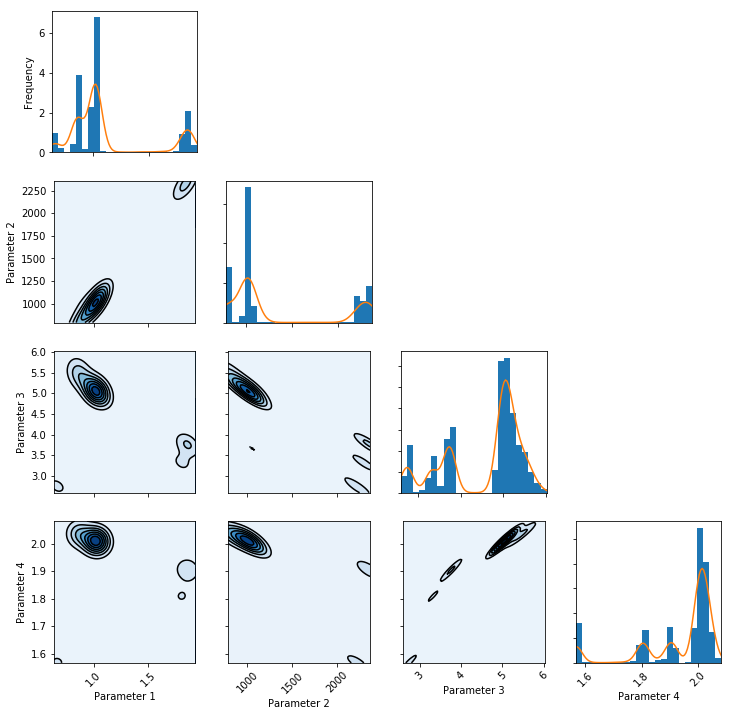

In [5]:
# Discard warm up
chains = chains[:, 2000:, :]

# Get samples
samples=np.vstack(chains)

# Look at distribution in chain 0
pints.plot.pairwise(samples, kde=True)

# Show graphs
plt.show()

### Raised to temperature T=0.5

Using Adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0.5        0:00.1
2     9      0         0.333     0.333      0:00.1
3     12     0.25      0.5       0.5        0:00.2
20    63     0.143     0.381     0.429      0:00.7
40    123    0.195122  0.22      0.415      0:01.4
60    183    0.18      0.164     0.393      0:02.1
80    243    0.173     0.16      0.308642   0:02.6
100   303    0.178     0.139     0.267      0:03.1
120   363    0.157     0.132     0.24       0:03.6
140   423    0.17      0.149     0.22       0:04.1
160   483    0.155     0.161     0.205      0:04.6
180   543    0.138     0.160221  0.227      0:05.1
Initial phase completed.
200   603    0.129     0.149     0.209      0:05.7
220   663    0.131     0.154     0.199095   0:06.3
240   723    0.153527  0.153527  0.219917   0:06.9
260   783    0.199     0.169

3100  9303   0.23      0.239     0.238      2:27.4
3120  9363   0.23      0.238     0.237      2:28.5
3140  9423   0.231455  0.237504  0.235      2:29.7
3160  9483   0.231     0.237583  0.234      2:30.8
3180  9543   0.231     0.238     0.233      2:31.9
3200  9603   0.231     0.238     0.232      2:33.1
3220  9663   0.231     0.238     0.231      2:34.2
3240  9723   0.231     0.237581  0.23       2:35.3
3260  9783   0.231     0.237     0.229      2:36.4
3280  9843   0.231     0.236     0.228      2:37.6
3300  9903   0.231748  0.236     0.228      2:38.7
3320  9963   0.232     0.236     0.228      2:39.9
3340  10023  0.231     0.236     0.227      2:41.0
3360  10083  0.232     0.236     0.227      2:42.1
3380  10143  0.232     0.235     0.226      2:43.3
3400  10203  0.232     0.235     0.225      2:44.4
3420  10263  0.233     0.235     0.225      2:45.6
3440  10323  0.232     0.234     0.225      2:46.7
3460  10383  0.233     0.234     0.226      2:47.8
3480  10443  0.234     0.234   

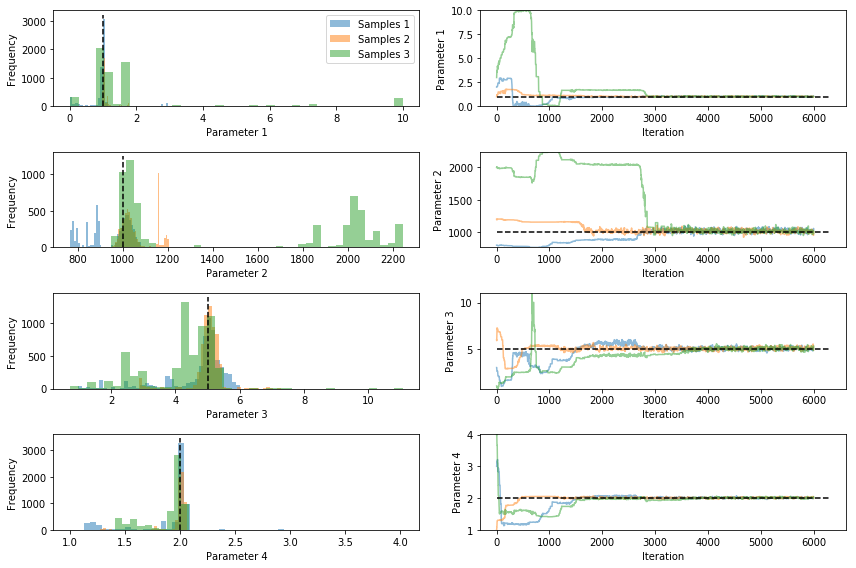

In [6]:
temperature = 0.5
log_posterior_t = TemperedLogPosterior(temperature=temperature, log_posterior=log_posterior)

mcmc = pints.MCMCSampling(log_posterior_t, 3, x0)
mcmc.set_max_iterations(6000)
chains = mcmc.run()

plt.figure()
pints.plot.trace(chains, ref_parameters=parameters)
plt.show()

ESS = 5785


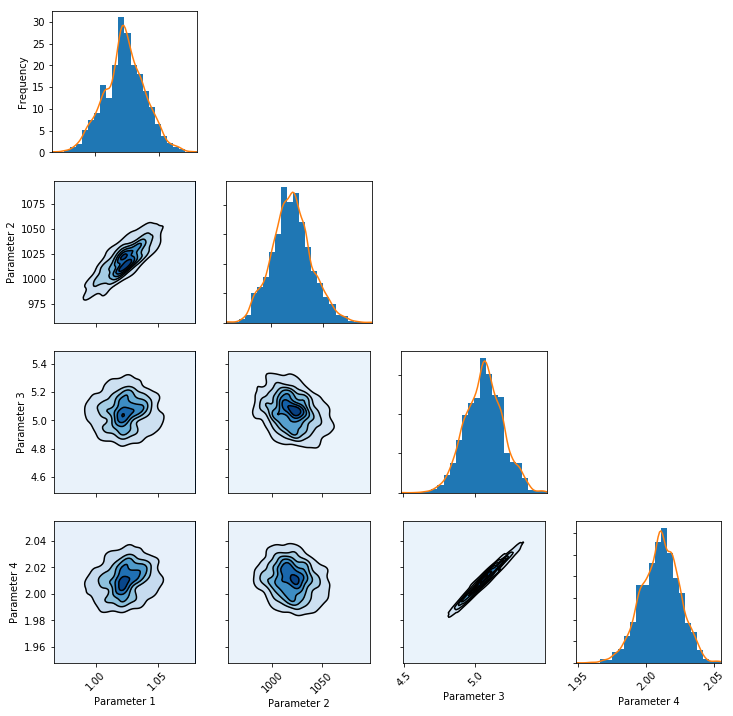

In [7]:
# Discard warm up
chains = chains[:, 2000:, :]

# Get samples
samples=np.vstack(chains)

log_weight = [temperature * log_posterior(sample) for sample in samples]
w = np.exp(log_weight - scipy.misc.logsumexp(log_weight))

print('ESS = ' + str(ess(w)))

idx = np.random.choice(len(w), size=ess(w), p=w)
samples1 = samples[idx, :]

# Look at distribution in chain 0
pints.plot.pairwise(samples1, kde=True)

# Show graphs
plt.show()

# Fitzhugh-Nagumo

Using Adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0          0:00.0
2     9      0.333     0         0.333      0:00.0
3     12     0.5       0         0.5        0:00.0
20    63     0.333     0.19      0.571      0:00.2
40    123    0.341     0.293     0.537      0:00.5
60    183    0.393     0.328     0.361      0:00.7
80    243    0.333     0.259     0.308642   0:00.9
100   303    0.287     0.208     0.248      0:01.0
120   363    0.298     0.174     0.207      0:01.3
140   423    0.262     0.149     0.177305   0:01.6
160   483    0.23      0.136646  0.161      0:01.9
180   543    0.204     0.121547  0.144      0:02.2
Initial phase completed.
200   603    0.184     0.114     0.129      0:02.5
220   663    0.172     0.104     0.127      0:02.8
240   723    0.178     0.108     0.145      0:03.2
260   783    0.222     0.126

3100  9303   0.231     0.272     0.228      1:18.1
3120  9363   0.23      0.27      0.227      1:18.6
3140  9423   0.23      0.269     0.228      1:19.1
3160  9483   0.231     0.267     0.229      1:19.7
3180  9543   0.230745  0.267     0.229      1:20.2
3200  9603   0.23      0.265542  0.229      1:20.8
3220  9663   0.23      0.265     0.229      1:21.3
3240  9723   0.229     0.263     0.229      1:21.9
3260  9783   0.229     0.262     0.229      1:22.4
3280  9843   0.229     0.261     0.229      1:23.0
3300  9903   0.229     0.26      0.23       1:23.5
3320  9963   0.23      0.258657  0.23       1:24.0
3340  10023  0.231     0.258     0.23       1:24.6
3360  10083  0.23      0.256     0.23       1:25.1
3380  10143  0.23      0.256     0.23       1:25.6
3400  10203  0.231     0.254631  0.23       1:26.2
3420  10263  0.231     0.253     0.229      1:26.7
3440  10323  0.23      0.253     0.228422   1:27.2
3460  10383  0.23      0.251     0.229      1:27.8
3480  10443  0.23      0.25    

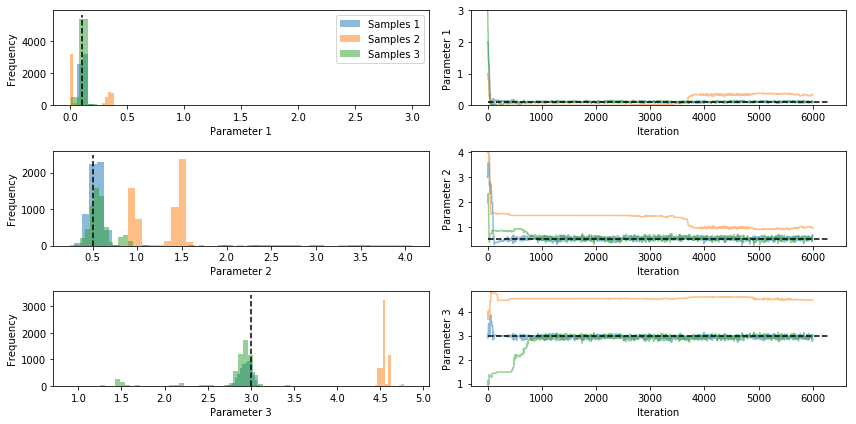

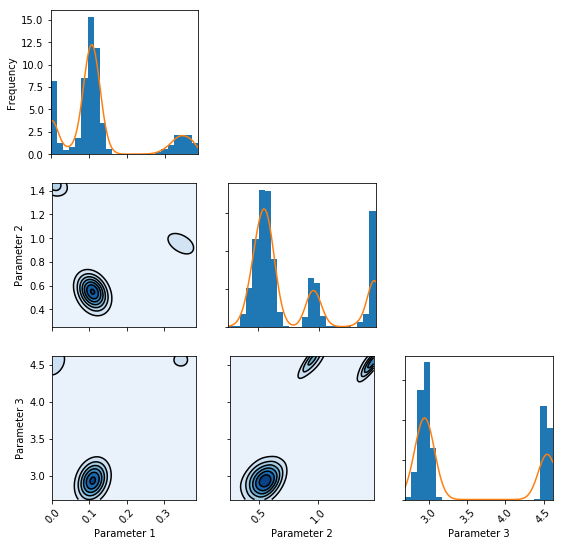

In [8]:
# Create a model
model = pints.toy.FitzhughNagumoModel()

# Run a simulation
parameters = [0.1, 0.5, 3]
times = np.linspace(0, 20, 200)
values = model.simulate(parameters, times)

# First add some noise
sigma = 0.5
noisy = values + np.random.normal(0, sigma, values.shape)

problem = pints.MultiOutputProblem(model, times, noisy)

log_likelihood = pints.KnownNoiseLogLikelihood(problem, sigma)

log_prior = pints.UniformLogPrior([0, 0, 0], [10, 10, 10])

# Initial guesses
x0 = [
    [2, 3, 3],
    [1, 4, 4],
    [3, 2, 1],
]

log_posterior = pints.LogPosterior(log_likelihood, log_prior)
mcmc = pints.MCMCSampling(log_posterior, 3, x0)
mcmc.set_max_iterations(6000)
chains = mcmc.run()

plt.figure()
pints.plot.trace(chains, ref_parameters=parameters)
plt.show()

# Discard warm up
chains = chains[:, 1000:, :]

# Get samples
samples=np.vstack(chains)

# Look at distribution in chain 0
pints.plot.pairwise(samples, kde=True)

# Show graphs
plt.show()

Using Adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0         0          0:00.0
2     9      0.333     0         0          0:00.0
3     12     0.25      0.25      0.25       0:00.0
20    63     0.571     0.619     0.429      0:00.2
40    123    0.488     0.537     0.561      0:00.4
60    183    0.442623  0.459     0.525      0:00.6
80    243    0.358     0.444     0.556      0:00.9
100   303    0.307     0.376     0.535      0:01.4
120   363    0.256     0.331     0.455      0:01.8
140   423    0.22      0.305     0.411      0:02.1
160   483    0.193     0.286     0.366      0:02.5
180   543    0.177     0.265     0.337      0:02.9
Initial phase completed.
200   603    0.164     0.254     0.313      0:03.3
220   663    0.172     0.244     0.29       0:03.8
240   723    0.191     0.278     0.315      0:04.4
260   783    0.226     0.299

3100  9303   0.224     0.228     0.243      1:17.4
3120  9363   0.225     0.227     0.244      1:17.8
3140  9423   0.224     0.227     0.244      1:18.3
3160  9483   0.225     0.226     0.244      1:18.9
3180  9543   0.224     0.225     0.244      1:19.4
3200  9603   0.225     0.224     0.243049   1:19.9
3220  9663   0.224     0.222     0.243      1:20.5
3240  9723   0.225     0.223     0.243      1:21.0
3260  9783   0.225     0.223     0.242257   1:21.6
3280  9843   0.225     0.223     0.242      1:22.2
3300  9903   0.225     0.223     0.241139   1:22.7
3320  9963   0.225     0.223     0.241      1:23.2
3340  10023  0.224     0.223     0.24       1:23.7
3360  10083  0.226     0.225     0.241      1:24.2
3380  10143  0.227     0.224     0.24       1:24.8
3400  10203  0.227     0.223     0.241      1:25.3
3420  10263  0.227     0.223     0.241      1:25.9
3440  10323  0.227     0.224     0.241      1:26.4
3460  10383  0.226     0.223     0.241      1:27.0
3480  10443  0.225     0.223499

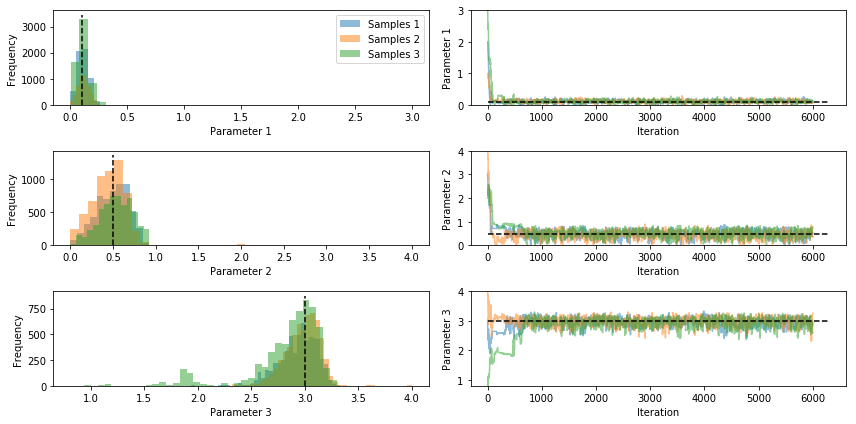

In [9]:
temperature = 0.9
log_posterior_t = TemperedLogPosterior(temperature=temperature, log_posterior=log_posterior)

mcmc = pints.MCMCSampling(log_posterior_t, 3, x0)
mcmc.set_max_iterations(6000)
chains = mcmc.run()

plt.figure()
pints.plot.trace(chains, ref_parameters=parameters)
plt.show()

ESS = 1416


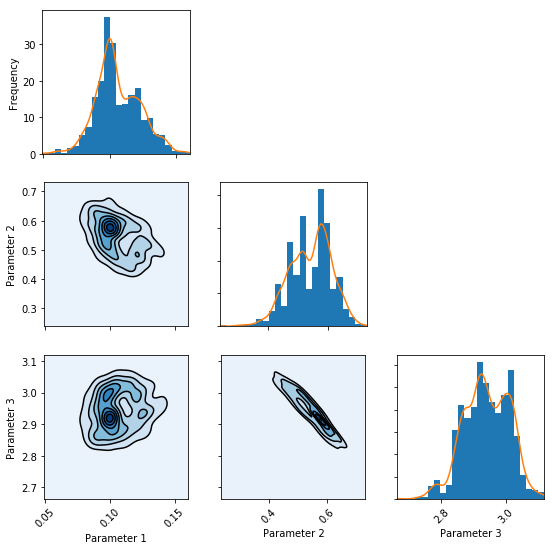

In [10]:
# Discard warm up
chains = chains[:, 1000:, :]

# Get samples
samples=np.vstack(chains)

log_weight = [temperature * log_posterior(sample) for sample in samples]
w = np.exp(log_weight - scipy.misc.logsumexp(log_weight))

print('ESS = ' + str(ess(w)))

idx = np.random.choice(len(w), size=ess(w), p=w)
samples1 = samples[idx, :]

# Look at distribution in chain 0
pints.plot.pairwise(samples1, kde=True)

# Show graphs
plt.show()